# Introdução ao PyTorch

## Instalação

In [0]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag



platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

import numpy as np
import torch

###Carregado helpers

In [0]:
"""Funções retirada do curso "Pytorch Schorlarship Chalenge" da Udacity e Facebook """

import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

        
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


## Usando torch para criar Tensores

In [0]:
print(torch.randn(2,2,requires_grad=True))

## Definindo função Sigmoid

In [0]:
# Definindo uma função sigmoid com Numpy
def sigmoid(z):
  return 1/(1 + np.exp(-z))


#Rodando a função sigmoid de 1 e de numpy arrays
s1 = sigmoid(1)
s2 = sigmoid(np.array([-1,0,1]))

print(s1)
print(s2)

# Rede neural com Numpy

In [0]:
class NeuralNetwork:
  def __init__(self):
    self.inputLayerSize = 2
    self.hiddenLayerSize = 3
    self.outputLayerSize = 1
    
    self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize)
    self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize)
    
  #Propagate a matrix X
  def forward(self, X):
    self.z2 =np.dot(X, self.W1)
    self.a2 = sigmoid(self.z2)
    self.z3 = np.dot(self.a2, self.W2)
    yHat = sigmoid(self.z3)
    return yHat
  
  def sigmoidPrime(z):
    #Derivative of sigmoid function
    return np.exp(-z)/((1+np.exp(-z))**2)
  
  def costFunctionPrime(self, X, y):
    self.yHat = self.forward(X)
    
    delta3 = np.multiply(-(y- self.yHat), self.sigmoidPrime(self.z3))
    dJdW2 = np.dot(self.a2.T, delta3)

    delta2 = np.dot(delta3, self.W2.T) *self.sigmoidPrime(self.z2)
    dJsW1 = np.dot(X.T,delta2)

    return dJdW1, dJdW2
    
    
  

In [0]:
NN =NeuralNetwork()


X = np.random.randn(NN.hiddenLayerSize,NN.inputLayerSize)
y = np.random.randn(NN.hiddenLayerSize,1)
print(X.shape)
yHat= NN.forward(X)

print(yHat)



NN2 = NeuralNetwork()
print(NN2)
    
    
    

# Redes neurais com PyTorch


In [0]:
from torch import nn
#Usando nn.Module
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x
    
    
net = Network()
print('net:',net1)


import torch.nn.functional as F

class NetworkF(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)
        
        return x
    
netF = NetworkF()
print('netF:',netF)


nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

 
print('netS:',netS)
      

  

## Carregando Dataset a ser usado (MNIST)

In [0]:
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

MNIST é um banco de dados de digitos escritos à mão que usaremsos para treinar e testar nossa rede neural.
Esse banco de dados tem algumas limitaações. Por exemplo, não conseguimos abrir o resultado de download em nenhum software de edição de imagens.

![alt text](https://github.com/talesmgodois/deep-learning-v2-pytorch/raw/c53f4393f0300d083041068f3e094d3c68be342f/intro-to-pytorch/assets/mnist.png)

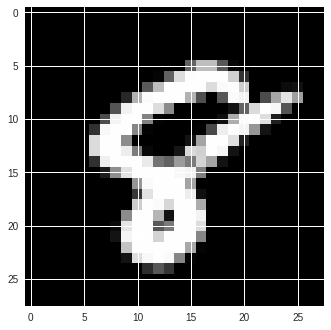

In [0]:
def plot_imgs(id):
  plt.imshow(images[id].numpy().squeeze(), cmap='Greys_r')
  
dataiter = iter(trainloader)
images,labes = next(dataiter)
plot_imgs(1)

## Vamos rodar nossa rede neural?


In [0]:
netS = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)

# print(images[0:])
ps = netS.forward(images[0,:])

# plt.imshow(images[0].view(1,28,28).numpy().squeeze())
view_classify(images[0].view(1, 28, 28), ps)
print(ps)
print(max(ps[0]))
print(min(ps[0]))

# Hora de treinar essa belezinha



In [0]:
from torch import nn

netS = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))


#Definindo o erro
criterion = nn.NLLLoss()
print(criterion)

#Rodando o método forwaard para pegar os outputs
# ps = netS.forward(images[0,:])
print(ps)

""""
  
  Definido um otizador, este será responsável por atualizar os pesos com uma taxa de aprendizado( o Alfa lá de trás ) de 0.1
  optim.SGD vem de Stochstic Gradient Descent
  
"""
optimizer = optim.SGD(netS.parameters(), lr=0.01)
print(optimizer)


#Número de iterações
epochs = 2

for i in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    #Mudo o formato de visualização das imagens
    images = images.view(images.shape[0], -1)
    
    #O treino começa a qui pra valer

    #zerando o gradient, vamos testar sem essa linha para ver o que acontece
    optimizer.zero_grad()
    
    #forward no modelo
    output = netS.forward(images)
#     print(output)
    
    #Cálculo do erro
    loss = criterion(output, labels)

    #backPropagation
    loss.backward()
    
    #Atualização dos pesos
    optimizer.step()
    
    #Erro total do dataset
    running_loss += loss.item()
    
  else:
    #pra cada for interno vamos calcular a melhora no cálculo do erro
    print(f"Training loss: {running_loss/len(trainloader)}")
    
    
    
    
    
    
    




# Usando a rede treinada

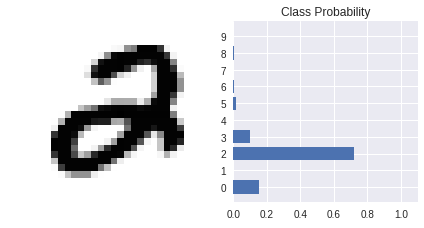

In [0]:
%matplotlib inline

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = netS.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)